- target datasets : AdultCensusIncomeForecast
- 데이터 분석과 결측치 처리
- 범주형/범주형, 연속형/연속형 컬럼들 관계성 증명(최소 2개 씩)

In [115]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Font settings
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # Prevent minus sign issues


orgDf = pd.read_csv('../../datasets/population.csv')
orgDf.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K




4. 연속형 변수 관계 분석 (최소 2쌍)
- 상관계수 분석 (Pearson/Spearman)
- 산점도 작성
예시 쌍:
- age vs hours-per-week  
- capital-gain vs capital-loss

5. 시각화
- 범주형: 막대그래프, 파이차트
- 연속형: 히스토그램, 박스플롯
- 관계: 산점도, 히트맵

In [116]:
# 1. 데이터 탐색 (EDA)
# - 기본 통계량 확인 (describe())
# - 결측치 현황 파악 (workclass, occupation, native_country)
# - 노동과 관련된 결측치가 많아보임 > 이 사람들을 무직자라고 생각해도 괜찮은걸까?
# - 각 컬럼의 데이터 타입 확인
# - 타겟 변수(income) 분포 확인/

# orgDf.describe()
# orgDf.info()
# orgDf.value_counts()

In [117]:
# 2. 결측치 처리
# - 수치형 변수: 평균/중앙값 대체
# - 범주형 변수: 최빈값 대체 
# - 필요시 결측치가 많은 컬럼 제거 검토 (비율로 봤을때는 용인 할만함 > 삭제할까?)

# 삭제하는게 나아보임 > 왜냐 직업이랑, 출신지는 대표하는 특성이 없기에

editDf= orgDf.dropna()
editDf


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [118]:
# 3. 범주형 변수 관계 분석 (최소 2쌍)
# - 교차표(crosstab) 작성
# - 카이제곱 검정
# - 크래머 V 계수 계산
# 예시 쌍:
# - Education vs Occupation
# - Age vs Working hrs


# Cat / Cat

# 1) Education vs Occupation
# 교차표 작성
crosstab_edu_occ = pd.crosstab(editDf['education_num'], editDf['occupation'])

# 카이제곱 검정
chi2, p_value = chi2_contingency(crosstab_edu_occ)[:2]

# 크래머 V 계수
n = crosstab_edu_occ.sum().sum()
min_dim = min(crosstab_edu_occ.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 2) Race, Workclass
# 교차표 작성
crosstab_workclass_race = pd.crosstab(editDf['workclass'], editDf['race'])

# 카이제곱 검정
chi2, p_value = chi2_contingency(crosstab_workclass_race)[:2]

# 크래머 V 계수
n = crosstab_workclass_race.sum().sum()
min_dim = min(crosstab_workclass_race.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))


# Con/ Con

# 1) Age vs Working hrs

crosstab_age_wrkhr = pd.crosstab(editDf['age'], editDf['hours_per_week'])

# 카이제곱 검정
chi2, p_value = chi2_contingency(crosstab_age_wrkhr)[:2]

# 크래머 V 계수
n = crosstab_age_wrkhr.sum().sum()
min_dim = min(crosstab_age_wrkhr.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))


### Cat / Cat

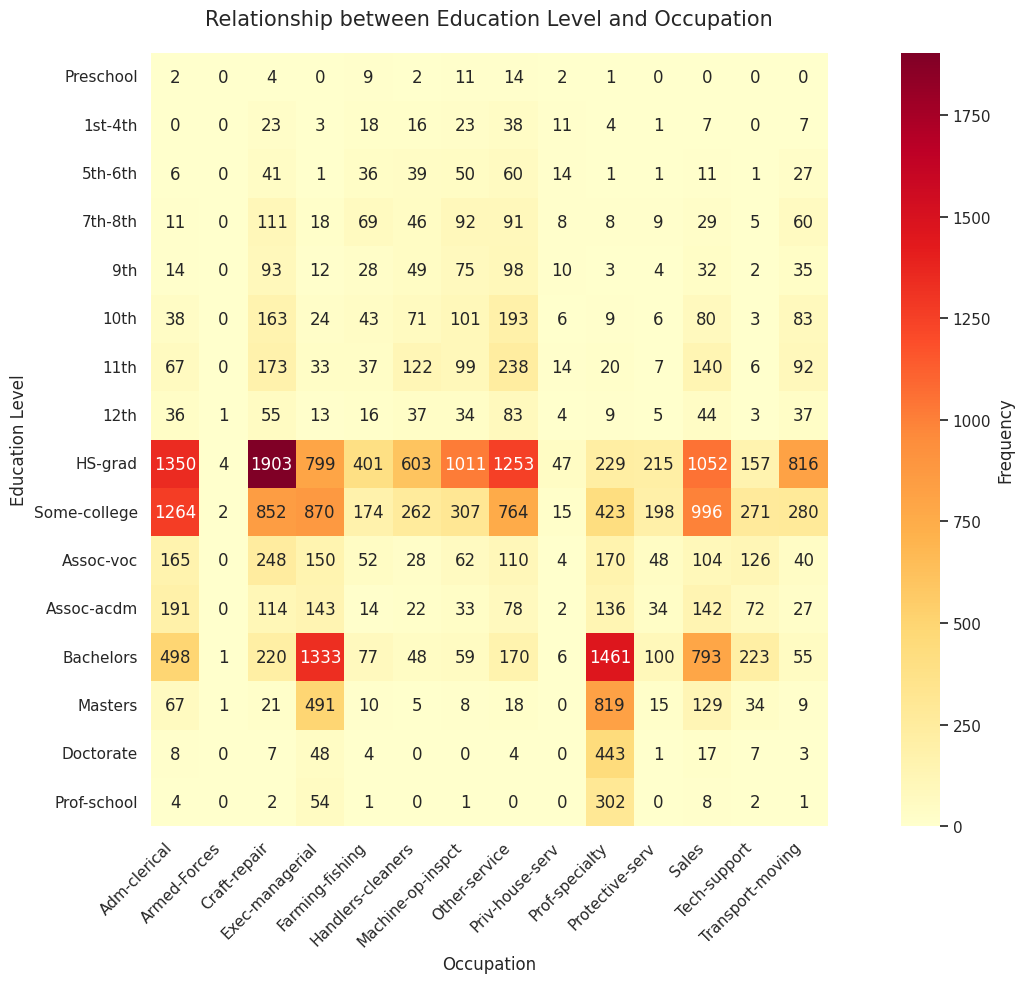


=== Statistical Analysis Results ===
Chi-square statistic: 15358.84
p-value: 0.00e+00
Cramer's V coefficient: 0.1979

=== Interpretation ===
Association Strength based on Cramer's V:
• Weak association

Statistical Significance:
• There is a statistically significant relationship between education level and occupation


In [119]:


# Font settings
plt.rcParams['font.family'] = 'sans-serif'

# Education level mapping dictionary
education_mapping = {
    1: 'Preschool',
    2: '1st-4th',
    3: '5th-6th',
    4: '7th-8th',
    5: '9th',
    6: '10th',
    7: '11th',
    8: '12th',
    9: 'HS-grad',
    10: 'Some-college',
    11: 'Assoc-voc',
    12: 'Assoc-acdm',
    13: 'Bachelors',
    14: 'Masters',
    15: 'Doctorate',
    16: 'Prof-school'
}

# Create cross-tabulation
crosstab_edu_occ = pd.crosstab(editDf['education_num'], editDf['occupation'])

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(crosstab_edu_occ)

# Calculate Cramer's V coefficient
n = crosstab_edu_occ.sum().sum()
min_dim = min(crosstab_edu_occ.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Visualization: Education vs Occupation
plt.figure(figsize=(15, 10))

# Change index to education level names
crosstab_edu_occ.index = [education_mapping[i] for i in crosstab_edu_occ.index]

# Create heatmap
heatmap = sns.heatmap(crosstab_edu_occ, 
                      annot=True,  
                      fmt='d',     
                      cmap='YlOrRd',
                      cbar_kws={'label': 'Frequency'},
                      square=True)

plt.title('Relationship between Education Level and Occupation', pad=20, size=15)
plt.xlabel('Occupation', size=12)
plt.ylabel('Education Level', size=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print statistical results
print("\n=== Statistical Analysis Results ===")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")
print(f"Cramer's V coefficient: {cramers_v:.4f}")

# Interpretation
print("\n=== Interpretation ===")
print("Association Strength based on Cramer's V:")
if cramers_v < 0.1:
    print("• Very weak association")
elif cramers_v < 0.3:
    print("• Weak association")
elif cramers_v < 0.5:
    print("• Moderate association")
else:
    print("• Strong association")

print("\nStatistical Significance:")
if p_value < 0.05:
    print("• There is a statistically significant relationship between education level and occupation")
else:
    print("• No statistically significant relationship found between education level and occupation")


1. 통계적 유의성:
- p-value가 0에 가까운 값(0.00e+00)으로, 교육 수준과 직업 간의 관계는 통계적으로 매우 유의미합니다
이는 두 변수 간의 관계가 우연히 발생했을 가능성이 극히 낮다는 것을 의미합니다
2. 연관성 강도:
- Cramer's V 계수가 0.1979로 약한 연관성을 보여줍니다
일반적으로 Cramer's V:
0.1 미만: 무시할 만한 연관성
0.1-0.3: 약한 연관성
0.3-0.5: 중간 정도의 연관성
0.5 이상: 강한 연관성
3. 실무적 의미:
- 교육 수준이 직업 선택에 영향을 미치지만, 그 영향력은 예상보다 약할 수 있습니다
이는 현대 사회에서 다음과 같은 현상을 반영할 수 있습니다:
교육과 직업의 미스매치 현상
직업 선택의 다양성 증가
비전통적 경력 경로의 증가
4. 시사점:
- 채용 및 인사 정책:
교육 수준만을 기준으로 한 채용은 재고될 필요가 있습니다
다양한 배경을 가진 인재 채용을 고려해야 합니다
- 교육 정책:
직업과 교육의 연계성을 강화할 필요가 있습니다
실무 중심의 교육 프로그램 개발이 필요할 수 있습니다

### Con / Con

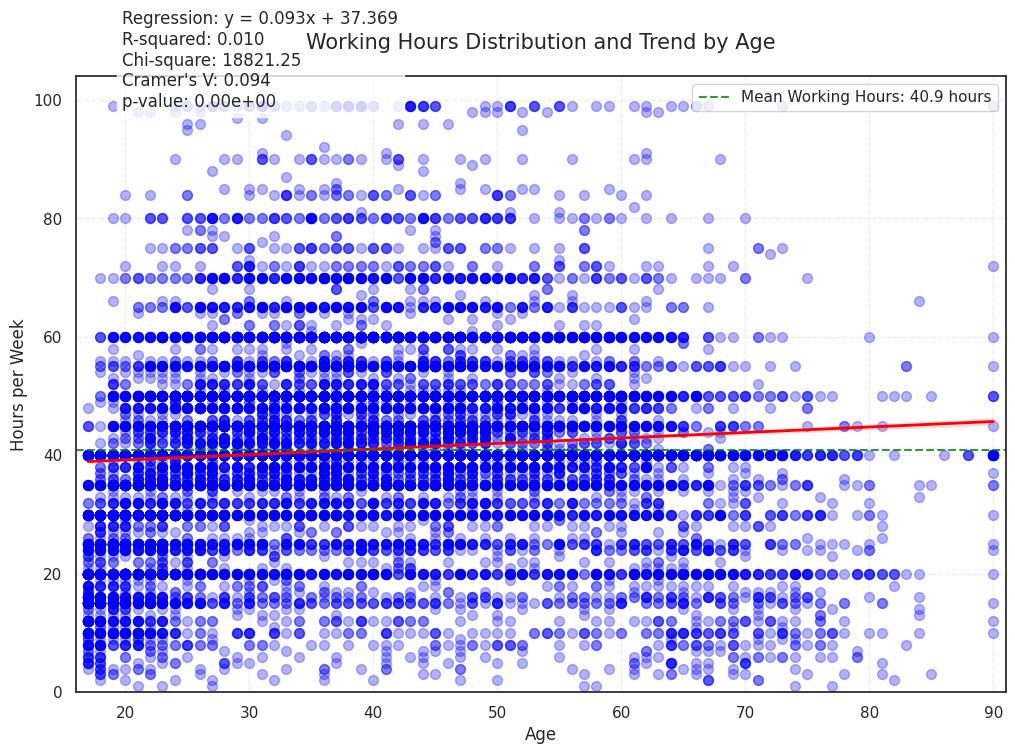


=== Data Summary ===
• Mean Working Hours: 40.93 hours (SD: 11.98)
• Mean Age: 38.44 years (SD: 13.13)
• Age Range: 17 - 90 years
• Working Hours Range: 1 - 99 hours

=== Relationship Analysis ===
• Correlation: weak positive correlation (coefficient: 0.102)
• Chi-square statistic: 18821.25
• Cramer's V: 0.094
• For each year increase in age, working hours change by 0.093 hours on average
• Model explanation power: 1.0%
• Statistical significance: significant (p-value: 0.00e+00)


In [120]:
# 1) Age vs Working Hours Analysis

# Create cross-tabulation of age and working hours
crosstab_age_wrkhr = pd.crosstab(editDf['age'], editDf['hours_per_week'])

# Perform chi-square test
chi2, p_value = chi2_contingency(crosstab_age_wrkhr)[:2]

# Calculate Cramer's V coefficient
n = crosstab_age_wrkhr.sum().sum()
min_dim = min(crosstab_age_wrkhr.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Visualization settings
plt.figure(figsize=(12, 8))

# Create scatter plot with regression line
sns.regplot(data=editDf, 
            x='age', 
            y='hours_per_week',
            scatter_kws={'alpha':0.3, 'color': 'blue', 's': 50},
            line_kws={'color': 'red', 'linewidth': 2},
            ci=95)

# Add mean working hours line
mean_hours = editDf['hours_per_week'].mean()
plt.axhline(y=mean_hours, 
            color='green', 
            linestyle='--', 
            alpha=0.8,
            label=f'Mean Working Hours: {mean_hours:.1f} hours')

# Graph styling
plt.title('Working Hours Distribution and Trend by Age', size=15, pad=20)
plt.xlabel('Age', size=12)
plt.ylabel('Hours per Week', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(editDf['age'].min()-1, editDf['age'].max()+1)
plt.ylim(0, editDf['hours_per_week'].max()+5)

# Statistical analysis results
# Regression analysis
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(editDf['age'], editDf['hours_per_week'])

# Add statistical information
stats_text = (
    f'Regression: y = {slope:.3f}x + {intercept:.3f}\n'
    f'R-squared: {r_value**2:.3f}\n'
    f'Chi-square: {chi2:.2f}\n'
    f'Cramer\'s V: {cramers_v:.3f}\n'
    f'p-value: {p_value:.2e}'
)

plt.text(0.05, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=12)

plt.legend()
plt.show()

# Print statistical results
print("\n=== Data Summary ===")
print(f"• Mean Working Hours: {mean_hours:.2f} hours (SD: {editDf['hours_per_week'].std():.2f})")
print(f"• Mean Age: {editDf['age'].mean():.2f} years (SD: {editDf['age'].std():.2f})")
print(f"• Age Range: {editDf['age'].min():.0f} - {editDf['age'].max():.0f} years")
print(f"• Working Hours Range: {editDf['hours_per_week'].min():.0f} - {editDf['hours_per_week'].max():.0f} hours")

print("\n=== Relationship Analysis ===")
# Determine correlation strength
if abs(r_value) < 0.3:
    strength = "weak"
elif abs(r_value) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if r_value > 0 else "negative"

print(f"• Correlation: {strength} {direction} correlation (coefficient: {r_value:.3f})")
print(f"• Chi-square statistic: {chi2:.2f}")
print(f"• Cramer's V: {cramers_v:.3f}")
print(f"• For each year increase in age, working hours change by {slope:.3f} hours on average")
print(f"• Model explanation power: {r_value**2:.1%}")
print(f"• Statistical significance: {'significant' if p_value < 0.05 else 'not significant'} (p-value: {p_value:.2e})")


1. 근무시간 분포 분석:
- 평균 근무시간은 40.93시간으로, 일반적인 주 40시간 근무와 비슷한 수준입니다
- 표준편차가 11.98시간으로 상당한 변동성을 보입니다
- 근무시간 범위가 1시간부터 99시간까지로 매우 넓습니다
  * 초단시간 근로자부터 장시간 근로자까지 다양한 근무형태가 존재함을 시사

2. 연령 분포 특성:
- 평균 연령은 38.44세이며, 표준편차는 13.13년입니다
- 17세부터 90세까지 매우 넓은 연령대가 분포하고 있습니다
- 근로자 연령층이 청소년부터 고령자까지 매우 다양함을 보여줍니다

3. 연령과 근무시간의 관계:
- 약한 양의 상관관계(0.102)를 보입니다
- 연령이 1년 증가할 때마다 근무시간은 평균 0.093시간(약 5.6분) 증가
- 모델 설명력이 1%로 매우 낮아, 연령만으로는 근무시간을 예측하기 어렵습니다

4. 통계적 유의성:
- p-value가 매우 낮아 통계적으로는 유의미합니다
- Cramer's V가 0.094로 매우 약한 연관성을 보여줍니다
- 실제적인 의미에서는 두 변수 간의 관계가 미미함을 시사합니다

5. 실무적 시사점:
- 인력 운영 측면:
  * 연령대별 근무시간 차이가 크지 않아 연령 기반의 근무시간 조정은 불필요
  * 다양한 연령대의 근로자들이 비슷한 근무패턴을 보일 수 있음
- 정책적 측면:
  * 연령 차별 없는 근무환경 조성이 가능함을 시사
  * 유연근무제 도입 시 연령을 주요 고려사항으로 삼을 필요성이 낮음

6. 결론:
연령과 근무시간 사이에는 통계적으로 유의미한 관계가 있으나, 실질적인 영향력은 매우 미미합니다. 이는 현대 직장에서 근무시간이 연령보다는 직무 특성, 산업 분야, 개인의 선택 등 다른 요인들에 의해 더 크게 영향을 받을 수 있음을 시사합니다. 따라서 근무시간 정책 수립 시 연령보다는 직무 특성이나 업무 효율성 등 다른 요인들을 우선적으로 고려해야 할 것으로 보입니다.